In [12]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

# Ideas
GMM assumes there are multiple normal distributions generating the data. Our goal is to figure out what those distributions are, and which data points belong to each one.

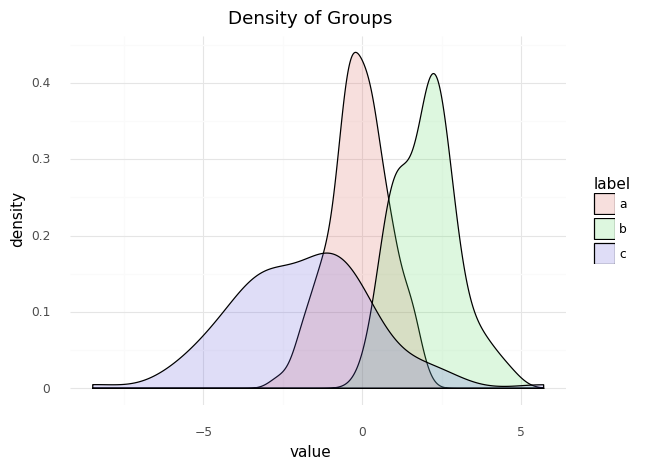

<ggplot: (8743128191525)>


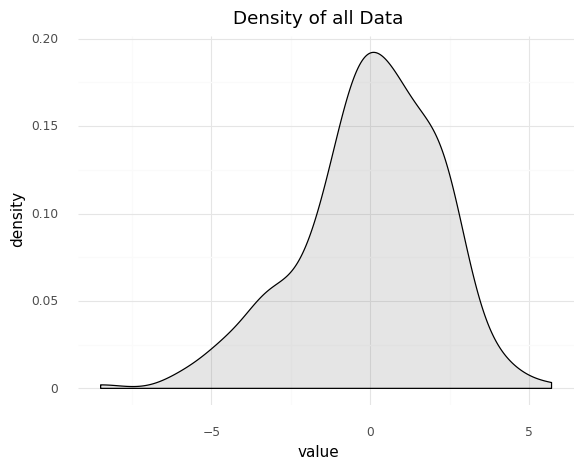

<ggplot: (8743132833713)>


In [13]:
np.random.seed(42)

n = 100

a = np.random.normal(size = n, loc = 0, scale = 1)
b = np.random.normal(size = n, loc = 2, scale = 1)
c = np.random.normal(size = n, loc = -2, scale = 2)

combo = np.concatenate([a,b,c])

label = np.repeat(["a","b", "c"], n)

df = pd.DataFrame({"value": combo, "label": label})

print(ggplot(df,aes(x = "value", fill = "label")) + geom_density(alpha = 0.2) +
 labs(title = "Density of Groups") + theme_minimal())
print(ggplot(df,aes(x = "value")) + geom_density(alpha = 0.2, fill = "gray") +
 labs(title = "Density of all Data") + theme_minimal())

# SKLEARN

In [14]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


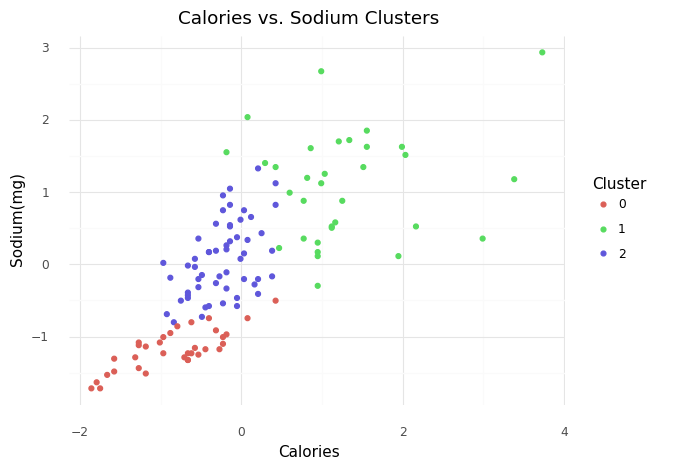

<ggplot: (8743128037085)>

In [15]:
# single GMM
X = bk[["Calories", "Sodium(mg)"]]

z = StandardScaler()
X[["Calories", "Sodium(mg)"]] = z.fit_transform(X)

gmm = GaussianMixture(n_components = 3)
gmm.fit(X)

X["cluster"] = gmm.predict(X)

(ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color = "factor(cluster)")) + geom_point() + 
 theme_minimal() + labs(title = "Calories vs. Sodium Clusters") +
 scale_color_discrete(name = "Cluster"))

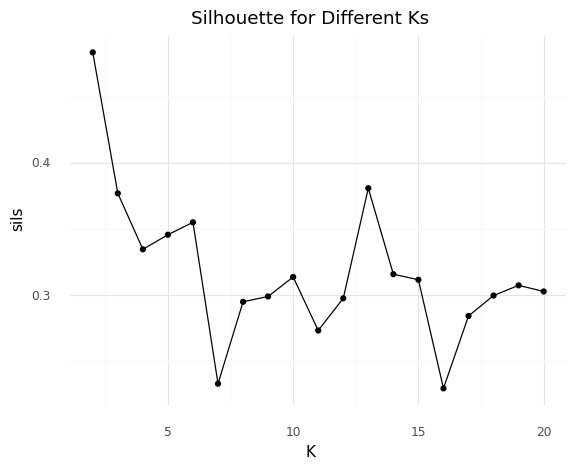

<ggplot: (8743128993125)>

In [16]:
features = ["Calories", "Sodium(mg)"]
X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X)

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sils = []

for k in ks:
  gmm = GaussianMixture(n_components = k)
  gmm.fit(X[features])

  sils.append(silhouette_score(X[features], gmm.predict(X[features])))

sil_df = pd.DataFrame({"K": ks,
                      "silhouette": sils})

(ggplot(sil_df, aes(x = "K", y = "sils")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette for Different Ks"))

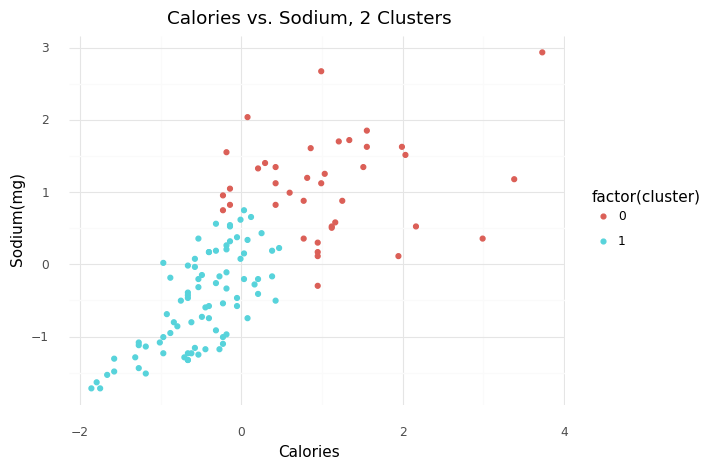

<ggplot: (8743125900005)>

In [31]:
# fit final model

gmm = GaussianMixture(n_components = 2)
gmm.fit(X[features])

clusters = gmm.predict(X[features])

X["cluster"] = clusters

(ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Calories vs. Sodium, 2 Clusters"))


In [32]:
print(silhouette_score(X[features], clusters))

0.48357137404062256


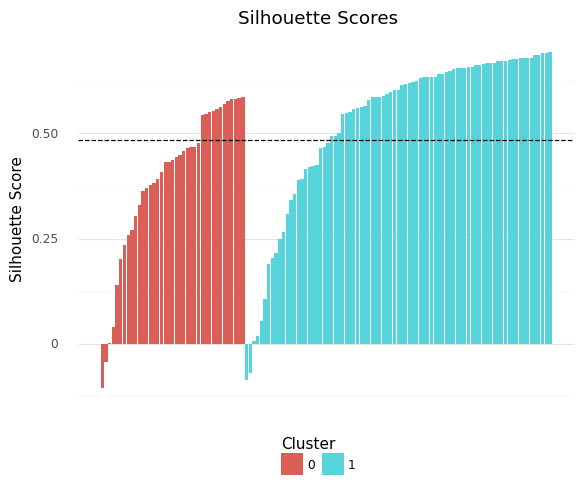

<ggplot: (8743132176861)>

In [33]:
sil_points = silhouette_samples(X[features], clusters)
# sil_points

# add silhouette scores and clusters to X
X["sil"] = sil_points
X["cluster"] = clusters

# sort X by cluster and silhouette score just to look better
X = X.sort_values(by = ["cluster", "sil"], ascending = True)

# number rows for graphing
X["number"] = range(0,X.shape[0])


(ggplot(X, aes(x = "number", y = "sil", fill = "factor(cluster)")) + 
geom_bar(stat = "identity") +
geom_hline(yintercept = np.mean(sil_points), linetype = "dashed") +
theme_minimal() + 
labs(x = "", y = "Silhouette Score", title = "Silhouette Scores") + 
theme(axis_text_x= element_blank(),
panel_grid_major_x= element_blank(),
panel_grid_minor_x= element_blank(),
legend_position= "bottom") +
scale_fill_discrete(name = "Cluster"))

# Multiple Dimensions

In [36]:
# sugar protein fat
features = ["Sugar(g)", "Protein(g)", "Fat(g)"]

X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])




In [37]:
# model
gmm = GaussianMixture(n_components = 3)
gmm.fit(X[features])

GaussianMixture(n_components=3)

In [39]:
# predictions
cluster = gmm.predict(X[features])
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [40]:
# sil
silhouette_score(X[features], cluster)

0.41269446652563374

In [41]:
# probabilities
gmm.predict_proba(X[features])

array([[6.61610659e-023, 9.99999415e-001, 5.85130020e-007],
       [9.54619426e-019, 9.99999998e-001, 2.08090892e-009],
       [8.26491593e-024, 1.00000000e+000, 5.65851237e-017],
       [1.10138989e-010, 1.00000000e+000, 4.07225869e-021],
       [1.54584050e-016, 1.00000000e+000, 5.71032883e-019],
       [2.28985615e-017, 9.99999739e-001, 2.60794614e-007],
       [3.23093253e-018, 1.00000000e+000, 1.78783299e-011],
       [2.94114465e-014, 1.00000000e+000, 1.86268166e-029],
       [2.45979727e-002, 9.75402027e-001, 7.97298032e-025],
       [8.53743710e-001, 1.46256290e-001, 4.75716633e-051],
       [9.98891720e-001, 1.10827980e-003, 1.44028577e-095],
       [9.99997573e-001, 2.42696410e-006, 3.48854951e-138],
       [5.79067452e-001, 4.20932548e-001, 3.88876052e-018],
       [5.16467876e-001, 4.83532124e-001, 7.84132485e-021],
       [9.70230232e-001, 2.97697682e-002, 2.05227689e-058],
       [9.89404706e-001, 1.05952940e-002, 3.90622426e-066],
       [9.99989440e-001, 1.05599883e-005

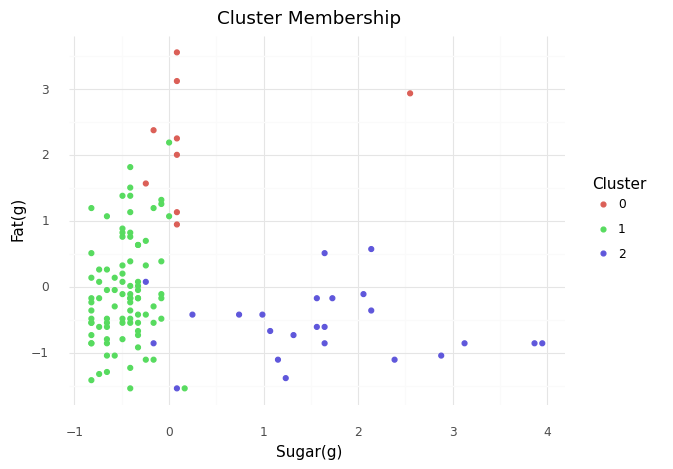

<ggplot: (8743125757989)>

In [42]:
# graph
X["cluster"] = cluster

(ggplot(X, aes(x = "Sugar(g)", y = "Fat(g)", color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership") + scale_color_discrete(name ="Cluster"))

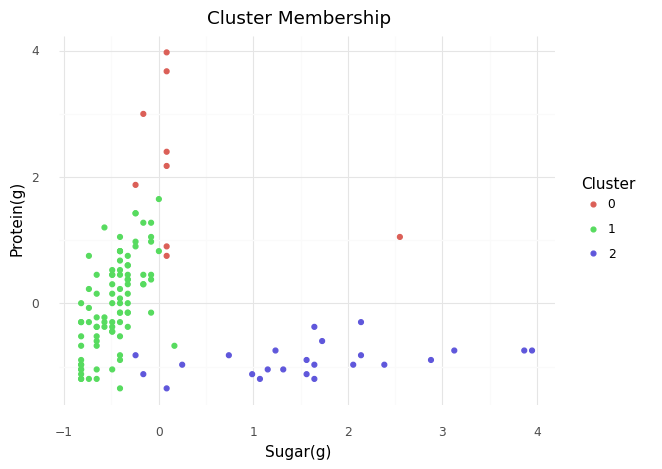

<ggplot: (8743128179417)>

In [43]:
(ggplot(X, aes(x = "Sugar(g)", y = "Protein(g)", color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership") + scale_color_discrete(name ="Cluster"))

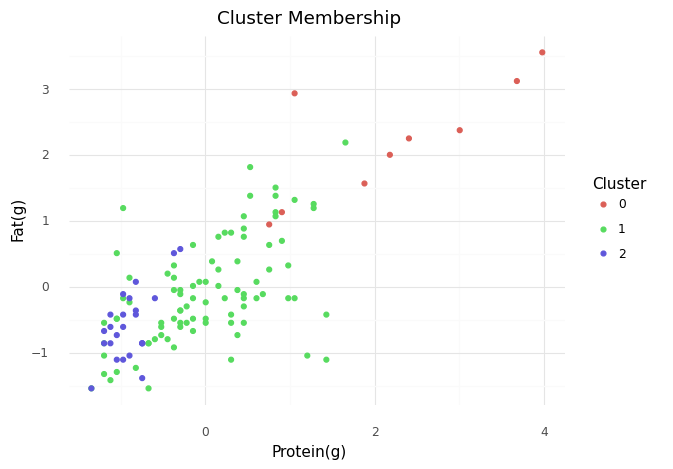

<ggplot: (8743128175061)>

In [44]:
(ggplot(X, aes(x = "Protein(g)", y = "Fat(g)", color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership") + scale_color_discrete(name ="Cluster"))

# Another Example

In [45]:
bey = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
bey.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


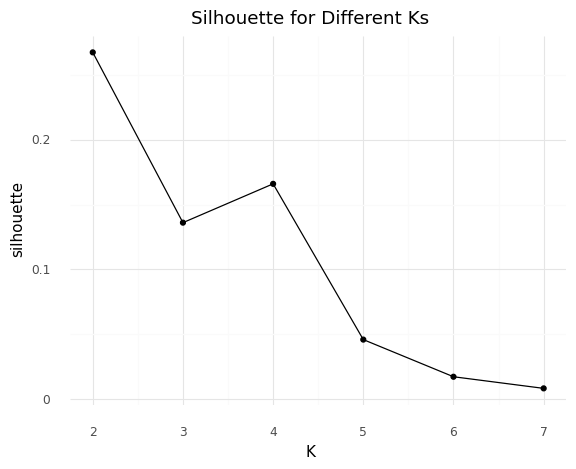

<ggplot: (8743125670953)>

In [52]:
features = ["speechiness", "acousticness", "instrumentalness", "liveness", "valence"]

# z = StandardScaler() they have the same scale
X[features] = bey[features]

n_components = [2,3,4,5,6,7]

sils = []

for n in n_components:
  gmm = GaussianMixture(n_components=n)
  gmm.fit(X[features])

  colName = "assignments" + str(n)
  clusters = gmm.predict(X[features])

  X[colName] = clusters

  sils.append(silhouette_score(X[features], clusters))

sil_df = pd.DataFrame({"K": n_components,
                      "silhouette": sils})

(ggplot(sil_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette for Different Ks"))

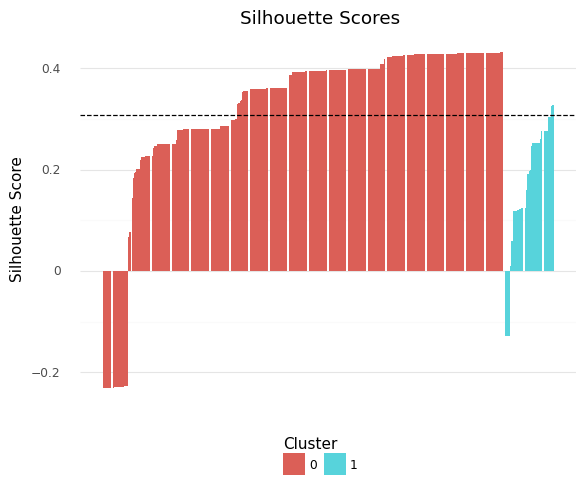

<ggplot: (8743125497557)>

In [53]:
# model
gmm = GaussianMixture(n_components=2)
gmm.fit(X[features])

cluster = gmm.predict(X[features])

sil_points = silhouette_samples(X, cluster)
# sil_points

# add silhouette scores and clusters to X
X["sil"] = sil_points
X["cluster"] = cluster

# sort X by cluster and silhouette score just to look better
X = X.sort_values(by = ["cluster", "sil"], ascending = True)

# number rows for graphing
X["number"] = range(0,X.shape[0])


(ggplot(X, aes(x = "number", y = "sil", fill = "factor(cluster)")) + 
geom_bar(stat = "identity") +
geom_hline(yintercept = np.mean(sil_points), linetype = "dashed") +
theme_minimal() + 
labs(x = "", y = "Silhouette Score", title = "Silhouette Scores") + 
theme(axis_text_x= element_blank(),
panel_grid_major_x= element_blank(),
panel_grid_minor_x= element_blank(),
legend_position= "bottom") +
scale_fill_discrete(name = "Cluster"))